# Cyclistic Bike Share Analysis

This project aims to analyze the Cyclistic bike share data to understand usage patterns and provide insights to increase the conversion of casual riders into subscribers.

### Project Objective:
Provide the marketing team at Cyclistic with recommendations on how to convert Customers (casual riders) into Subscribers. These recommendations must be backed-up with compelling analyses and visualizations.

### Business Problem:
Increasing the company's profit through maximizing annual memberships (subscriptions).

### Dataset Overview:
The dataset contains the following columns:
- **Trip_id**: Unique identifier for each trip
- **Start_time**: Start time of the trip
- **End_time**: End time of the trip
- **Bikeid**: Unique identifier for each bike
- **Tripduration**: Duration of the trip in seconds
- **From_station_id**: ID of the starting station
- **From_station_name**: Name of the starting station
- **To_station_id**: ID of the destination station
- **To_station_name**: Name of the destination station
- **Usertype**: Type of user (Customer or Subscriber)
- **Gender**: Gender of the user
- **Birthyear**: Birth year of the user

### Steps Involved:
1. **Data Cleaning**: Handling missing values, converting data types, and preparing the data for analysis.
2. **Exploratory Data Analysis (EDA)**: Analyzing the data to understand usage patterns and trends.
3. **Visualizations**: Creating visualizations to illustrate key insights.
4. **Insights and Recommendations**: Providing actionable insights and recommendations to the marketing team.

### Importance of the Analysis:
Converting casual riders to subscribers is crucial for Cyclistic as it provides a steady stream of revenue and enhances customer loyalty. By understanding the factors that influence casual riders' decisions, we can devise targeted marketing strategies to increase subscriptions.

## Data Loading and Cleaning
The following code loads the dataset and performs initial cleaning steps such as handling missing values, checking duplicates and converting data types.

In [1]:
# Import the necessary librarires.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (Cyclistic trips from the 1st quarter of 2019).
df = pd.read_csv(r"CyclisticData\Divvy_Trips_2019_Q1.csv")

In [3]:
# First look on the the number of non-null values & the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [4]:
# Display the first fifty rows of the dataframe
df.head(50)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [6]:
# Check the number of missing (null) values in each column.
missing_values = df.isnull().sum()
print(missing_values)

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64


In [7]:
# Fill missing gender values with 'Unknown' as the values are already strings, so filling them won't affect statistical analysis.
df['gender'].fillna('Unknown', inplace=True)

In [8]:
# Handle null values in 'birthyear'.
# Check the percentage of missing values to decide if we should calculate and fill with the median value, drop null values or fill with a string.
missing_birthyear_percentage = df['birthyear'].isnull().mean() * 100
print(f"Missing birthyear percentage: {missing_birthyear_percentage:.2f}%")

Missing birthyear percentage: 4.94%


The percentage of missing 'birthyear' values is 4.94% of the whole column, so dropping them would mean losing other data that may be useful in the analysis process and filling them with a calculated value, like the median or the mean would lead to skewing the results of statistical analyses and lead to false conclusions.

So, the best thing to do in this scenario is to leave them as NaN for now. This approach will lead to more accurate analysia and save the integrity of the data.

Converting some data types into the appropriate types.

In [9]:
# Converting tripduration data type to numeric to be able to work with it in mathematical analysis.

# If we try to convert 'tripduration' datatype from object to integer, an error would occur as some values contain ','.
# To solve this, I'll strip 'tripduration' of commas before conversion.

df['tripduration'] = df['tripduration'].str.replace(',', '')
print(df['tripduration'])

0          390.0
1          441.0
2          829.0
3         1783.0
4          364.0
           ...  
365064     757.0
365065     332.0
365066     846.0
365067     178.0
365068     448.0
Name: tripduration, Length: 365069, dtype: object


In [10]:
# Converting tripduration data type to numeric.
df['tripduration'] = pd.to_numeric(df['tripduration'])
print(df['tripduration'])

0          390.0
1          441.0
2          829.0
3         1783.0
4          364.0
           ...  
365064     757.0
365065     332.0
365066     846.0
365067     178.0
365068     448.0
Name: tripduration, Length: 365069, dtype: float64


In [11]:
# Convert 'start_time' and 'end_time' to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [12]:
# Convert birthyear column to numeric, while coercing errors.
df['birthyear'] = pd.to_numeric(df['birthyear'], errors='coerce')

In [13]:
# Making sure all the data types are now appropriate.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            365069 non-null  int64         
 1   start_time         365069 non-null  datetime64[ns]
 2   end_time           365069 non-null  datetime64[ns]
 3   bikeid             365069 non-null  int64         
 4   tripduration       365069 non-null  float64       
 5   from_station_id    365069 non-null  int64         
 6   from_station_name  365069 non-null  object        
 7   to_station_id      365069 non-null  int64         
 8   to_station_name    365069 non-null  object        
 9   usertype           365069 non-null  object        
 10  gender             365069 non-null  object        
 11  birthyear          347046 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 33.4+ MB


All the columns have the appropriate types.

In [14]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_bicycle_data.csv', index=False)

## Exploratory Data Analysis

We begin by analyzing the distribution of trip durations, the peak hours for trips, gender and age distributions of users...
This helps us understand the general usage patterns.

In [15]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

            trip_id         bikeid  tripduration  from_station_id  \
count  3.650690e+05  365069.000000  3.650690e+05    365069.000000   
mean   2.196087e+07    3429.484607  1.016342e+03       198.088816   
std    1.271750e+05    1923.321025  2.791351e+04       153.493553   
min    2.174244e+07       1.000000  6.100000e+01         2.000000   
25%    2.184876e+07    1777.000000  3.260000e+02        76.000000   
50%    2.196183e+07    3489.000000  5.240000e+02       170.000000   
75%    2.207182e+07    5157.000000  8.660000e+02       287.000000   
max    2.217853e+07    6471.000000  1.062840e+07       665.000000   

       to_station_id      birthyear  
count  365069.000000  347046.000000  
mean      198.581123    1981.674297  
std       154.468304      11.245683  
min         2.000000    1900.000000  
25%        76.000000    1975.000000  
50%       168.000000    1985.000000  
75%       287.000000    1990.000000  
max       665.000000    2003.000000  


#### Analyzing the distribution of 'trip_duration'
To analyze, I'll filter out the outliers.

In [16]:
# Filter tripduration to be between 1 minute (60 seconds) and 1 hour (3600 seconds).
filtered_df_1 = df[(df['tripduration'] > 60) & (df['tripduration'] < 3600)]

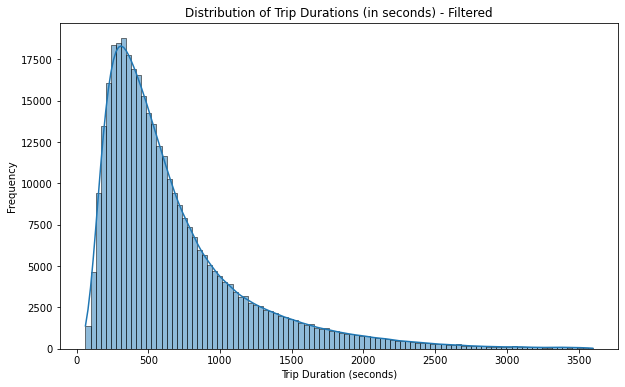

In [17]:
# Visualize filtered tripduration
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_1['tripduration'], bins=100, kde=True)
plt.title('Distribution of Trip Durations (in seconds) - Filtered')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Trip Durations
The previous histogram shows the distribution of trip durations. This visualization helps us understand the typical length of bike trips and identify patterns in trip duration.

### Insights:
Most trips are relatively short, with a significant peak around a few hundred seconds. This suggests that the majority of users are using the bikes for short commutes or quick trips.

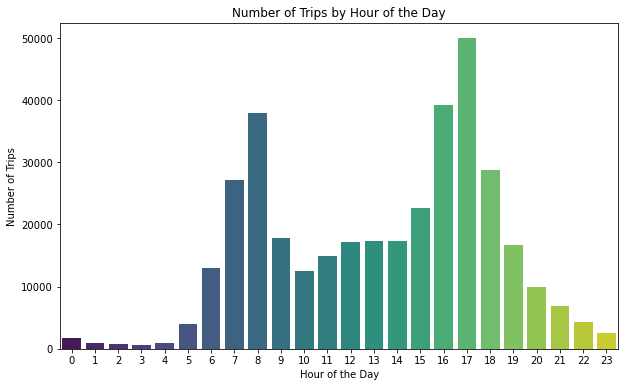

In [18]:
# Trips by time of the day

# Extract hour from start_time
df['start_hour'] = df['start_time'].dt.hour

# Plot number of trips by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='start_hour', data=df, palette='viridis')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

### Trips by Time (Hour) of The Day
This bar plot explores the hours in which trips are started.

### Insights:
It's obvious that peak times are in accordance with commuting times (around nine a.m and five p.m).

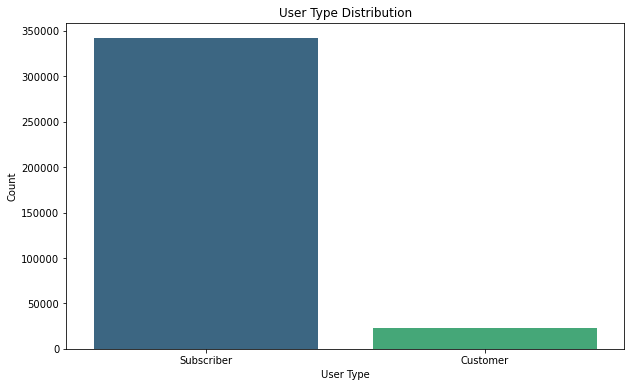

In [19]:
# User type distribution
# Plot user type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='usertype', data=df, palette='viridis')
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

### User Type Distribution
This bar chart explores the distribution of the two usertypes: customers and subscribers.
### Insights:
It's obvious that most users are subscribers with over 300,000 subscribers. Customers are a minority.

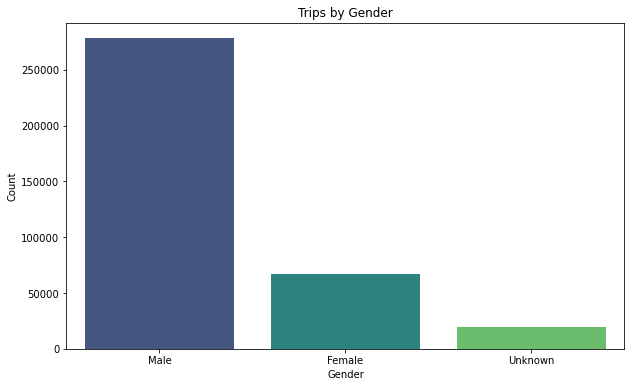

In [20]:
# Plot trips by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Trip Distribution by Gender
This bar chart shows the difference in the number of users from each gender and the number of users whose gender values were missing (marked as 'Unknown').
### Insights:
Most users are male, with more than 250,000 users. Females are a lot less than males, with just over 50,000 users. A proportion of the users have don't have data for 'gender' (missing values) as already calculated in the data cleaning segment.

In [21]:
# Top 10 start stations
top_start_stations = df['from_station_name'].value_counts().head(10)
print(top_start_stations)

Clinton St & Washington Blvd    7699
Clinton St & Madison St         6565
Canal St & Adams St             6342
Columbus Dr & Randolph St       4655
Canal St & Madison St           4571
Kingsbury St & Kinzie St        4395
Michigan Ave & Washington St    3992
Franklin St & Monroe St         3516
LaSalle St & Jackson Blvd       3252
Dearborn St & Monroe St         3246
Name: from_station_name, dtype: int64


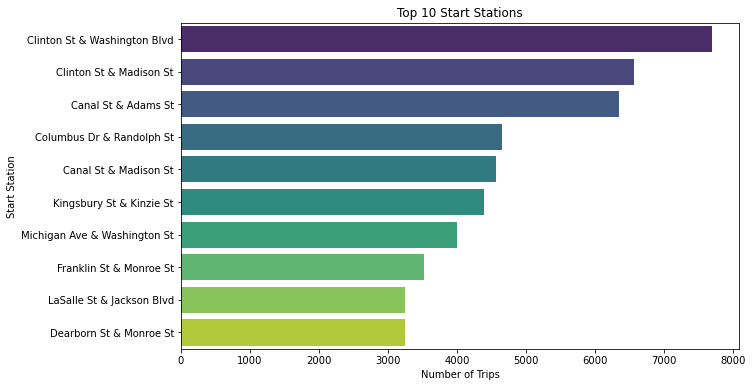

In [22]:
# Plot top 10 start stations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_start_stations.index, x=top_start_stations.values, palette='viridis')
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.show()

### Top 10 Start Stations
This graph shows the 10 most start stations by the number of trips started from them.
### Insights:
The top start station is: 'Clinton St & Washington Blvd', followed by 'Clinton St & Madison St'...

In [23]:
# Top 10 end stations
top_end_stations = df['to_station_name'].value_counts().head(10)
print(top_end_stations)

Clinton St & Washington Blvd     7699
Clinton St & Madison St          6859
Canal St & Adams St              6744
Canal St & Madison St            4875
Michigan Ave & Washington St     4412
Kingsbury St & Kinzie St         4376
LaSalle St & Jackson Blvd        3304
Clinton St & Lake St             3297
Clinton St & Jackson Blvd (*)    3137
Dearborn St & Monroe St          3137
Name: to_station_name, dtype: int64


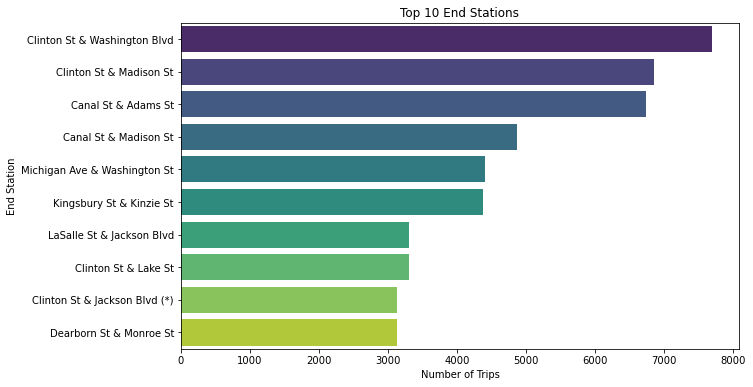

In [24]:
# Plot top 10 end stations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_end_stations.index, x=top_end_stations.values, palette='viridis')
plt.title('Top 10 End Stations')
plt.xlabel('Number of Trips')
plt.ylabel('End Station')
plt.show()

### Top 10 End Stations
This graph shows the 10 most End stations by the number of trips that ended in these stations.
### Insights:
The top end station is: 'Clinton St & Washington Blvd', followed by 'Clinton St & Madison St'...

The top 3 start stations are the same top 3 end stations, which might suggest 'back and forth' trips.

## Starting the more specific analysis
The goal is to increase the conversion of casual riders into annual members, as these are more profitable.To do so, we need to better understand how the two types differ.

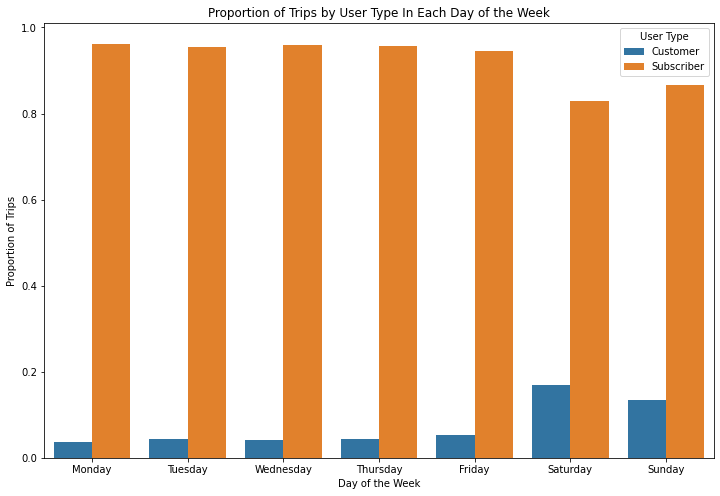

In [25]:
# Analyzing the number of trips taken at each day of the week for each usertype.

# Calculate the day of the week
df['day_of_week'] = df['start_time'].dt.day_name()

# Ensure the days of the week are ordered correctly.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Grouping by the two columns 'day_of_week' & 'usertype'.
trips_by_day_usertype = df.groupby(['day_of_week', 'usertype']).agg({'trip_id':['count']}).reset_index()

# Adding names to the columns to be able to visualize them.
trips_by_day_usertype.columns = ['day_of_week', 'usertype', 'trip_count']

# Group by day of the week to get the total number of trips per day.
total_trips_per_day = df.groupby('day_of_week').agg({'trip_id': 'count'}).reset_index()
total_trips_per_day.columns = ['day_of_week', 'total_trip_count']

# Merge the data frames to include the total trips per day.
trips_by_day_usertype = pd.merge(trips_by_day_usertype, total_trips_per_day, on='day_of_week')

# Calculating the proportion of trips taken by each user type of the total number of trips in each day of the week
# (Normalization is done to make the two usertypes visualizations comparable).
trips_by_day_usertype['proportion_of_trips'] = trips_by_day_usertype['trip_count'] / trips_by_day_usertype['total_trip_count']

# Visualize the analysis
# Make the size of the graph bigger as it contains more dense and tall bars.
plt.figure(figsize=(12, 8))
sns.barplot(data=trips_by_day_usertype, x='day_of_week', y='proportion_of_trips', hue='usertype')
plt.title('Proportion of Trips by User Type In Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Trips')
plt.legend(title='User Type')
plt.show()

### Proportion of Trips by User Type In Each Day of the Week
This chart shows the relative distribution of trips between user types for each day of the week.

### Insights:
The percentage of trips taken by subscribers is almost stable throught week days (Monday to Friday) and then decreases in weekends (Saturday and Sunday), which would suggest commuting.
On the other hand, customers trips percentages were at their highest on weekends and less so on weekdays. 

### Next Visualization:
I'll create another visualization to figure out if the increase in the percentage of customer trips in weekends is due to an increase in the number of customers trips, a decrease in the number of subscribers trips, or both.

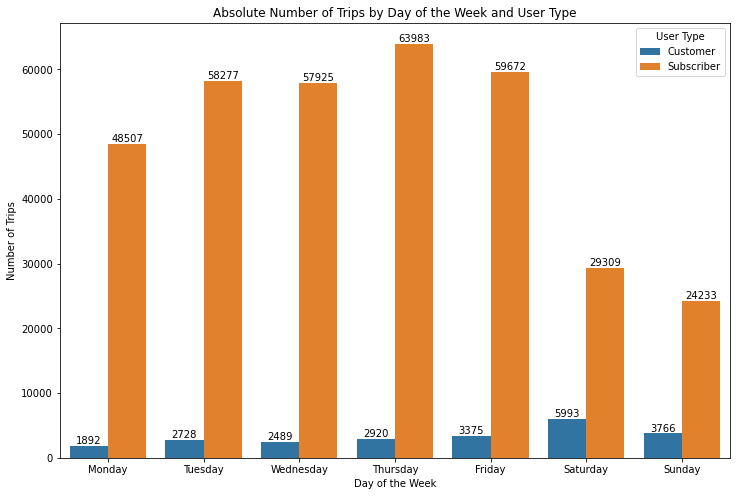

In [26]:
# Visualizing the number of trips for each usertype in each day of the week
plt.figure(figsize=(12, 8))
ax= sns.barplot(data=trips_by_day_usertype, x='day_of_week', y='trip_count', hue='usertype')

# Adding annotations
for container in ax.containers:
    ax.bar_label(container)

plt.title('Absolute Number of Trips by Day of the Week and User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()

### Number of Trips by Day of the Week and User Type
This bar graph shows the differences in the absolute number of trips taken by each usertype in each day of the week. I made this graph to know the reason the percentage of trips, taken by the two user types, changed on weekends.

### Insights:
1. The number of trips taken by subscribers in weekdays is always above 45,000 trips a day. On weekends, this number drops significantly to 29,309 on Saturday and 24,233 on Sunday.
2. The number of trips taken by customers increased on weekends, as the day with the most customer trips is Saturday (5993 trips) with almost double the number of trips taken on any weekday.

### Conclusions:
1. The increase in the percentage of customer trips on weekends is primarily due to an increase in the number of trips taken by customers, coupled with a decrease in the number of trips taken by subscribers on these days.
2. These insights suggest that customers are more likely to use the service for leisure activities on weekends, while subscribers are likely using it for commuting during weekdays.

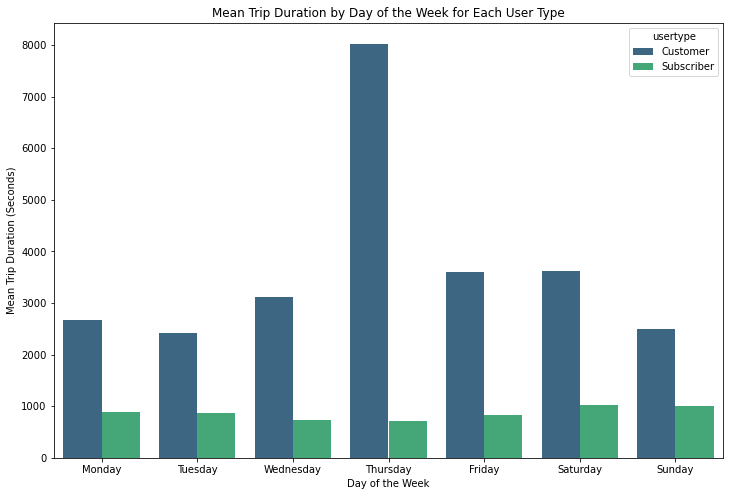

In [27]:
# Trip duration by day of the week
# Aggregating the data to find mean trip duration by day of the week and user type
mean_tripduration_by_day_usertype = df.groupby(['day_of_week', 'usertype'])['tripduration'].mean().reset_index()

# Sorting the days of the week to ensure correct order
mean_tripduration_by_day_usertype = mean_tripduration_by_day_usertype.sort_values('day_of_week')

# Plotting
# Make the size of the graph bigger as it contains more dense and tall bars.
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_tripduration_by_day_usertype, x='day_of_week', y='tripduration', hue='usertype', palette='viridis')
plt.title('Mean Trip Duration by Day of the Week for Each User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Trip Duration (Seconds)')
plt.show()

### Mean Trip Duration by Day of the Week For Each User Type:
This bar chart shows the difference in the average trip duration each user type takes in each day of the week.

### Insights:
For subscribers, the average trip duration is almost stable in each day of the week. For customers, the day with the lenghtheist trips is Thursday.

In [28]:
# Calculate number of trips for each user type
trip_counts = df['usertype'].value_counts()
print(trip_counts)

Subscriber    341906
Customer       23163
Name: usertype, dtype: int64


### Insight:
The majority of trips are from subscribers with 341906 trips. Customers took 23163 trips.

In [29]:
# Most popular start stations
popular_start_stations = df.groupby(['usertype', 'from_station_name'])['trip_id'].count().reset_index().sort_values(by='trip_id', ascending=False).groupby('usertype').head(10)
popular_start_stations.columns = ['User type','From station name','Trip Count']
print(popular_start_stations)

      User type             From station name  Trip Count
683  Subscriber  Clinton St & Washington Blvd        7611
679  Subscriber       Clinton St & Madison St        6345
618  Subscriber           Canal St & Adams St        6213
621  Subscriber         Canal St & Madison St        4461
685  Subscriber     Columbus Dr & Randolph St        4416
827  Subscriber      Kingsbury St & Kinzie St        4229
909  Subscriber  Michigan Ave & Washington St        3648
765  Subscriber       Franklin St & Monroe St        3430
835  Subscriber     LaSalle St & Jackson Blvd        3193
723  Subscriber       Dearborn St & Monroe St        3153
470    Customer       Streeter Dr & Grand Ave        1219
280    Customer     Lake Shore Dr & Monroe St        1142
414    Customer                Shedd Aquarium         834
344    Customer               Millennium Park         627
339    Customer         Michigan Ave & Oak St         386
7      Customer             Adler Planetarium         362
341    Custome

In [30]:
# Most popular end stations
popular_end_stations = df.groupby(['usertype', 'to_station_name'])['trip_id'].count().reset_index().sort_values(by='trip_id', ascending=False).groupby('usertype').head(10)
popular_end_stations.columns = ['User type','To station name','Trip Count']
print(popular_end_stations)

      User type                To station name  Trip Count
696  Subscriber   Clinton St & Washington Blvd        7570
692  Subscriber        Clinton St & Madison St        6666
633  Subscriber            Canal St & Adams St        6649
636  Subscriber          Canal St & Madison St        4748
847  Subscriber       Kingsbury St & Kinzie St        4303
929  Subscriber   Michigan Ave & Washington St        4002
691  Subscriber           Clinton St & Lake St        3246
854  Subscriber      LaSalle St & Jackson Blvd        3235
690  Subscriber  Clinton St & Jackson Blvd (*)        3064
739  Subscriber        Dearborn St & Monroe St        3049
481    Customer        Streeter Dr & Grand Ave        1934
286    Customer      Lake Shore Dr & Monroe St         891
353    Customer                Millennium Park         820
427    Customer                 Shedd Aquarium         640
347    Customer          Michigan Ave & Oak St         447
349    Customer   Michigan Ave & Washington St         4

### Most Popular Start Stations & Most Popular End Stations
For subscribers, the top stations (start and end) are: 'Clinton St & Washington Blvd', 'Clinton St & Madison St' and 'Canal St & Adams St'.

While for customers, the top stations (start and end) are: 'Streeter Dr & Grand Ave', 'Lake Shore Dr & Monroe St', 'Millennium Park' & 'Shedd Aquarium'. These stations should be targeted with ads for customers to be converted to subscribers.

In [31]:
# Calculate mean trip duration for each user type
mean_trip_duration = filtered_df_1.groupby('usertype')['tripduration'].mean()
print(mean_trip_duration)

usertype
Customer      1374.447398
Subscriber     633.720868
Name: tripduration, dtype: float64


### Insight: 
Customers (casual riders) trips take longer durations than members.

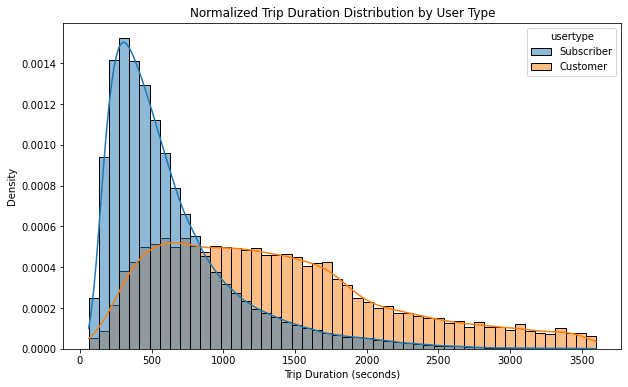

In [32]:
#Trip Duration Distribution by User Type (Normalized):
# Normalization is done to make the differences between the two user types clearer and more obvious as the number of trips taken by customers is very little compared to those taken by subscribers.

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df_1, x='tripduration', hue='usertype', bins=50, kde=True, stat='density', common_norm=False)
plt.title('Normalized Trip Duration Distribution by User Type')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Density')
plt.show()

### Normalizd Trip Duration Distribution by User Type:
This histogram shows the distribution of the trip duration of the trips taken by each user type. This can help us in creating marketing campaigns based on the conclusions.
Normalization was done, by calculating the density of the number of trips, to make the comparison easier and clearer.
### Insight:
It's obvious that Customers take longer duration trips than Subscribers as most trips that are longer than 1500 seconds are taken by customers. On the other hand, most subscribers trips are less than 1000 seconds.

In [33]:
# Calculate percentage of missing birthyear values for each usertype
unknown_birthyear_percentages = df.groupby('usertype')['birthyear'].apply(lambda x: (x.isna()).mean() * 100)
print(unknown_birthyear_percentages)

usertype
Customer      73.936882
Subscriber     0.262353
Name: birthyear, dtype: float64


### Insight:
The 'Customer' data is missing a lot (about three quarters) of 'birthyear' data. The company should try to gather more birthyear data from customers.

In [34]:
# Creating a new column 'age' based on 'birthyear' to check for the age distribution of users.

# Calculating this year to be able to calculate 'age' correctly.
current_year = pd.Timestamp.now().year

# Calculating 'age' by extracting 'current_year' from 'birthyear'
df['age'] = current_year - df['birthyear']

In [35]:
# Checking age for outliers
print(df['age'].describe())

count    347046.000000
mean         42.325703
std          11.245683
min          21.000000
25%          34.000000
50%          39.000000
75%          49.000000
max         124.000000
Name: age, dtype: float64


In [36]:
# Filter the 'age' data to only include people under 90 (removing outliers):
df_filtered_2 = df[df['age'] <= 90.0]

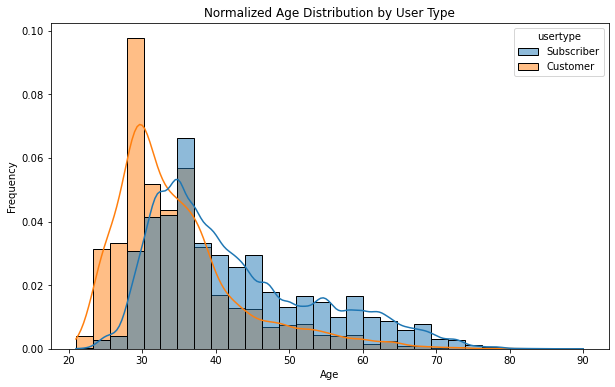

In [37]:
#Although 'Customer' data is missing a lot of 'birthyear' values and therefore also 'age' values, we'll work with the data that we have
#Age Distribution by User Type:
plt.figure(figsize=(10, 6))
sns.histplot(data= df_filtered_2, x= df_filtered_2['age'], hue= df_filtered_2['usertype'], kde=True, bins=30, stat = 'density', common_norm=False)
plt.title('Normalized Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Normalized Age Distribution by User Type
This bar chart shows the differences in age distribution between the two user types. This can help us create ad campaigns that suit the age segment we will target.
Normalization was done to make the comparison easier and clearer.

### Insight:
Younger people are more likely to be 'Customer' while older people are more likely to be 'Subsciber'.
Most people below thirty years are Customers.
Most people older than sixty years are Subscibers.

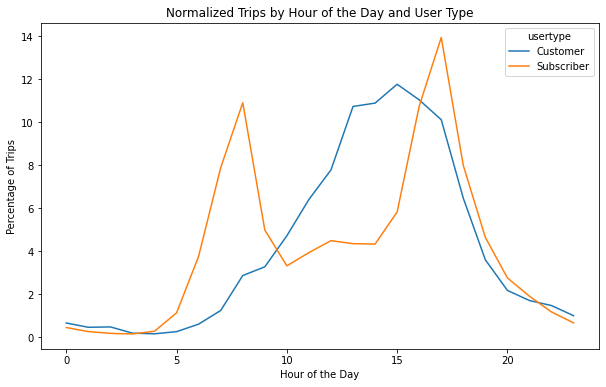

In [38]:
# Peak Hours for Trips by User Type (Normalized):

# Normalize counts by user type
hourly_counts = df.groupby(['usertype', 'start_hour']).size().reset_index(name='counts')
hourly_counts['percent'] = hourly_counts.groupby('usertype')['counts'].apply(lambda x: x / x.sum() * 100)

# Visualizing.
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x='start_hour', y='percent', hue='usertype')
plt.title('Normalized Trips by Hour of the Day and User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Trips')
plt.show()

### Normalized Trips by Hour of the Day and User Type:
This line graph shows the distribution of the number of trips accros the hours of the day, for each user type. This can help us understand the times customers take the most trips to make the ads at these hours. Normalization was done to make the comparison easier and clearer.

### Insights:
Subscribers are most likely to take trips at the times of going to and leaving work (nine and five).
Customers trips are usually between 10 am and 7 pm. They peak at around 3 pm.

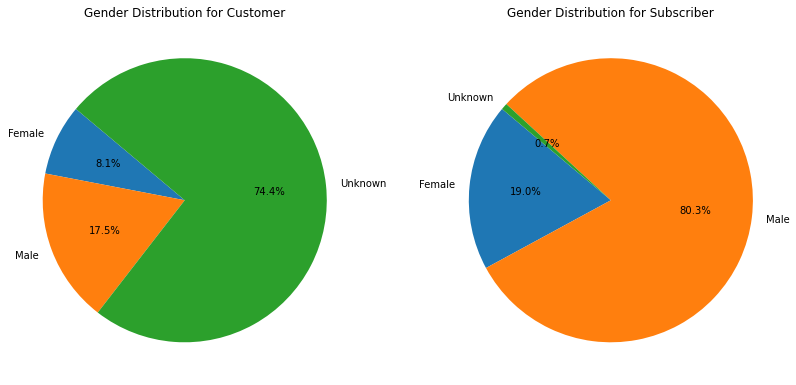

In [39]:
# Calculate gender percentages by user type
gender_user_type = df.groupby(['usertype', 'gender']).size().unstack().fillna(0)
gender_user_type = gender_user_type.div(gender_user_type.sum(axis=1), axis=0) * 100

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for ax, usertype in zip(axes, gender_user_type.index):
    ax.pie(gender_user_type.loc[usertype], labels=gender_user_type.columns, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Gender Distribution for {usertype}')

plt.show()

### Gender Distribution Piecharts For Each User Type:
These two pie charts show the percentages of users according to their gender and the percentage of users whose gender data is missing. One pie chart shows gender data percentages for customers, and the other for subscribers.

### Insights:
Predominantly Male Subscribers. Low Female Participation in both usertypes. High Percentage of unknown gender among customers.

### Summarizing All the Insights From the Analysis:
1. **Trip Duration**: Most trips are relatively short, with a significant peak around a few hundred seconds. This suggests that the majority of users are using the bikes for short commutes or quick trips.
2. **Trips Peak Times**: Most trips peak times are in accordance with commuting times (around nine a.m and five p.m).
3. **User Types**: Most users are subscribers with over 300,000 subscribers. Customers are a minority.
4. **Gender**: Most users are male, with more than 250,000 users. Females are a lot less than males, with just over 50,000 users. A proportion of the users have don't have data for 'gender' (missing values) as already calculated in the data cleaning segment.
5. **Trips Weekly Distribution**: The number of trips taken by subscribers is almost stable throught week days (Monday to Friday) and then decreases in weekends (Saturday and Sunday), which would suggest commuting. On the other hand, customers trips were at their highest on weekends and less so on weekdays.
6. **Trip Duration by User Type**: Customers (casual riders) trips take longer durations than members.
7. **Weekly Trip Duration**: For subscribers, the average trip duration is almost stable in each day of the week. For customers, the day with the lenghtheist trips is Thursday.
8. **Trip Count**: The majority of trips are from subscribers with 341906 trips. Customers took 23163 trips.
9. **Top Stations**: For subscribers, the top stations (start and end) are: 'Clinton St & Washington Blvd', 'Clinton St & Madison St' and 'Canal St & Adams St'. While for customers, the top stations (start and end) are: 'Streeter Dr & Grand Ave', 'Lake Shore Dr & Monroe St', 'Millennium Park' & 'Shedd Aquarium'. These stations should be targeted with ads for customers to be converted to subscribers.
10. **Trip Duration Distribution**: Customers take longer duration trips than Subscribers as most trips that are longer than 1500 seconds are taken by customers. On the other hand, most subscribers trips are less than 1000 seconds.
11. **Missing Birthyear Data**: The 'Customer' data is missing a lot (about three quarters) of 'birthyear' data. The company should try to gather more birthyear data from customers.
12. **Age Distribution**:Younger people are more likely to be 'Customer' while older people are more likely to be 'Subsciber'. Most people below thirty years are Customers. Most people older than sixty years are Subscibers.
13. **Peak Trip Times by User Type**: Subscribers are most likely to take trips at the times of going to and leaving work (nine and five). Customers trips are usually between 10 am and 7 pm. They peak at around 3 pm.
14. **Gender Participation**: Predominantly Male Subscribers. Low Female Participation in both usertypes. High Percentage of unknown gender among customers.

## Final Recommendations to the Marketing Team:
1. Weekend Advertising: Focus advertising efforts on weekends (Saturdays and Sundays), as these are the peak days for customer trips.
2. Target Key Stations: Place ads at top customer start and end stations such as 'Streeter Dr & Grand Ave', 'Lake Shore Dr & Monroe St', and 'Shedd Aquarium'.
3. Highlight Subscription Benefits: Emphasize the financial advantages of subscribing, particularly for users who take longer trips.
4. Youth-Centric Campaigns: Target younger audiences, especially those under thirty, as they form the majority of the customer base.
5. Peak Hour Advertising: Schedule ads around 3 p.m., which is the peak time for customer trips.
6. Data Collection Improvement: Implement strategies to collect comprehensive gender and birthyear data from customers to enhance future analyses.